# Udacity Machine Learning Capstone Project

## Data Exploration

In this section we will start by loading our datasets and visualize them to look at the distribution and feature available. This step will help us to select the most relevant data for our model.

In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

## Datasets :

- Bitcoin Price (./datasets/COIN_BTC.csv)
- Tweets (./datasets/tweets.csv available https://www.kaggle.com/alaix14/bitcoin-tweets-20160101-to-20190329)

### Bitcoin Price

We will first look at the Bitcoin Price datasets. The aim of this model is to predict if the price will go up or down based on the tweets of the day before. So we will be looking at the 24h price change (percent_change_24h). 

In [2]:
dataset_folder = 'datasets'
filename_coin = 'COIN_BTC.csv'

df_coin = pd.read_csv(os.path.join(dataset_folder, filename_coin))

In [3]:
df_coin.head()

,date,cmc_rank,slug,symbol,market_cap,price,circulating_supply,volume_24h,percent_change_1h,percent_change_24h,percent_change_7d
0,02/02/2014,1,Bitcoin,BTC,10190038594,825.37,12346025,11300875.0,-0.03,-1.25,-6.75
1,03/02/2014,1,Bitcoin,BTC,10174774413,823.83,12350575,13940069.0,0.09,-0.11,4.26
2,04/02/2014,1,Bitcoin,BTC,10229342576,827.96,12354875,16609697.0,-0.13,0.56,1.10
3,05/02/2014,1,Bitcoin,BTC,10034435954,811.91,12359050,22395116.0,-1.47,-2.08,-1.59
4,06/02/2014,1,Bitcoin,BTC,9662790968,781.55,12363625,50108744.0,0.07,-4.19,-4.68


In [4]:
df_coin.tail()

,date,cmc_rank,slug,symbol,market_cap,price,circulating_supply,volume_24h,percent_change_1h,percent_change_24h,percent_change_7d
2631,08/03/2021,1,Bitcoin,BTC,974321883623,52246.52,18648550,4.859743e+10,1.34,2.03,5.27
2632,09/03/2021,1,Bitcoin,BTC,1022439972862,54824.12,18649456,5.091223e+10,0.08,4.93,13.32
2633,10/03/2021,1,Bitcoin,BTC,1044580057477,56008.55,18650368,5.729558e+10,-1.64,2.16,10.82
2634,11/03/2021,1,Bitcoin,BTC,1078135604118,57805.12,18651212,5.677234e+10,-0.19,3.21,19.04
2635,12/03/2021,1,Bitcoin,BTC,1069366321844,57332.09,18652143,5.568994e+10,0.22,-0.82,17.18


In [5]:
df_coin.describe()


,cmc_rank,market_cap,price,circulating_supply,volume_24h,percent_change_1h,percent_change_24h,percent_change_7d
count,2636.0,2.636000e+03,2636.000000,2.636000e+03,2.636000e+03,2636.000000,2636.000000,2636.000000
mean,1.0,9.742015e+10,5481.743790,1.614905e+07,5.449159e+11,0.001385,0.179450,1.509621
std,0.0,1.446578e+11,7809.864979,1.847997e+06,2.746627e+13,0.822845,3.836825,10.620501
min,1.0,2.444375e+09,178.100000,1.234602e+07,2.857834e+06,-15.890000,-37.140000,-45.310000
25%,1.0,6.754451e+09,472.905000,1.471144e+07,4.570815e+07,-0.180000,-1.250000,-4.192500
50%,1.0,4.663255e+10,2843.505000,1.648004e+07,1.437850e+09,0.010000,0.160000,0.675000
75%,1.0,1.468193e+11,8293.980000,1.771492e+07,1.524146e+10,0.220000,1.650000,6.465000
max,1.0,1.078136e+12,57805.120000,1.865214e+07,1.410183e+15,5.350000,24.890000,79.700000


In [6]:
print(df_coin.isnull().sum(axis = 0))

date                  0
cmc_rank              0
slug                  0
symbol                0
market_cap            0
price                 0
circulating_supply    0
volume_24h            0
percent_change_1h     0
percent_change_24h    0
percent_change_7d     0
dtype: int64


## Comments

There are 11 parameters available but we are mainly interested about the percent_change_24h as the goal of this model is to predict if the price will go up or down. So we will focus our attention on this column.

There are no missing values. We can notice that the price of Bitcoin is very volatile as we can see changes of -37% or 24.9% in a single day.

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   3.,   4.,
          4.,  15.,  32.,  61., 124., 243., 771., 829., 285., 138.,  55.,
         31.,  17.,   7.,   6.,   2.,   3.,   0.,   2.]),
 array([-37.14      , -35.07233333, -33.00466667, -30.937     ,
        -28.86933333, -26.80166667, -24.734     , -22.66633333,
        -20.59866667, -18.531     , -16.46333333, -14.39566667,
        -12.328     , -10.26033333,  -8.19266667,  -6.125     ,
         -4.05733333,  -1.98966667,   0.078     ,   2.14566667,
          4.21333333,   6.281     ,   8.34866667,  10.41633333,
         12.484     ,  14.55166667,  16.61933333,  18.687     ,
         20.75466667,  22.82233333,  24.89      ]),
 <BarContainer object of 30 artists>)

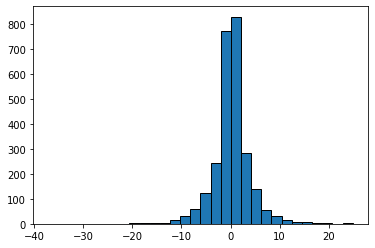

In [7]:
f, ax = plt.subplots()
ax.hist(df_coin['percent_change_24h'], bins = 30, edgecolor = 'black')



<AxesSubplot:title={'center':'Bitcoin Price \n UP = 1 / DOWN = 0'}>

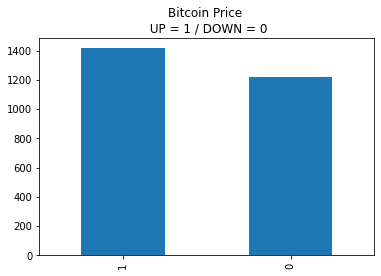

In [8]:
df_coin['UP OR DOWN'] = df_coin.apply(lambda row: 1 if row['percent_change_24h'] > 0 else 0, axis = 1)

df_coin['UP OR DOWN'].value_counts().plot(kind='bar', 
                                     title='Bitcoin Price \n UP = 1 / DOWN = 0')

In [9]:
df_coin['UP OR DOWN'].value_counts()

1    1416
0    1220
Name: UP OR DOWN, dtype: int64

In [10]:
price_up_count = df_coin['UP OR DOWN'].value_counts()[1]
price_down_count = df_coin['UP OR DOWN'].value_counts()[0]
price_up_percent = price_up_count / (price_up_count + price_down_count)

price_up_percent

0.5371775417298937

## Comments

Bitcoin price is going up 53.7% of the time and down 46.3% of the time for the period of data available.

## Tweets¶
We will now be looking at the second datasets which consist of 14M tweets scrapped from twitters between 1/1/2016 and 29/3/2019. The aim of this model is to predict if the price will go up or down based on the tweets of the day before. So we will be looking at the 24h price change (percent_change_24h).

In [11]:
dataset_folder = 'datasets'
filename_tweets = 'tweets.csv'

df_tweets = pd.read_csv(os.path.join(dataset_folder, filename_tweets), delimiter=';', skiprows=0, lineterminator='\n' )

#f = open(os.path.join(dataset_folder, filename_tweets), encoding='utf8')

c:\users\matde\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
df_tweets.head()

,id,user,fullname,url,timestamp,replies,likes,retweets,text\r
0,1.132977e+18,KamdemAbdiel,Abdiel kamdem,NaN,2019-05-27 11:49:14+00,0,0,0,È appena uscito un nuovo video! LES CRYPTOMONN...
1,1.132977e+18,bitcointe,Bitcointe,NaN,2019-05-27 11:49:18+00,0,0,0,Cardano: Digitize Currencies; EOS https://t.co...
2,1.132977e+18,3eyedbran,Bran - 3 Eyed Raven,NaN,2019-05-27 11:49:06+00,0,2,1,Another Test tweet that wasn't caught in the s...
3,1.132977e+18,DetroitCrypto,J. Scardina,NaN,2019-05-27 11:49:22+00,0,0,0,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,1.132977e+18,mmursaleen72,Muhammad Mursaleen,NaN,2019-05-27 11:49:23+00,0,0,0,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...


In [13]:
df_tweets.shape

(16889765, 9)

## Comments

The datasets containt more than 16M lines and have 9 columns. We can also notice that some of the tweets are not in english. As we only want to get the daily sentiment of all the tweets for a particular date we will only keep the following columns:
- timestamp
- replies
- likes 
- retweets
- text\r

Assuming that the overall sentiment will be the same for all the different language - we will only keep the tweets that are in english. (This would require further analysis to confirm this hypothesis)

In [14]:
df_tweets = df_tweets[['timestamp','replies','likes','retweets','text\r']]

In [15]:
df_tweets.head()

,timestamp,replies,likes,retweets,text\r
0,2019-05-27 11:49:14+00,0,0,0,È appena uscito un nuovo video! LES CRYPTOMONN...
1,2019-05-27 11:49:18+00,0,0,0,Cardano: Digitize Currencies; EOS https://t.co...
2,2019-05-27 11:49:06+00,0,2,1,Another Test tweet that wasn't caught in the s...
3,2019-05-27 11:49:22+00,0,0,0,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,2019-05-27 11:49:23+00,0,0,0,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...


## Comments

Something else important to notice is that many tweets have 0 likes. This is probably because the person who tweeted it only have a small audience or the tweet is simply not interesting. At this stage, I am making the decision to only include tweets that have more than 10 likes - this show that the tweet brought some kind of value other users and reach at least a small audience.

In [42]:
df_tweets = df_tweets[df_tweets['likes'] > 10].reset_index()
df_tweets

,level_0,index,timestamp,replies,likes,retweets,text\r,language
0,1,10,2019-05-27 11:49:19+00,0,14,2,One of the useful articles of Stefan; here is ...,en
1,2,11,2019-05-21 16:49:45+00,47,81,84,"BTC IS STILL GOING STRONG!!\n\nThus, we are gi...",en
2,5,14,2019-05-27 08:13:06+00,5,167,68,"Bitcoin Price Hits $8,939 in New 2019 High: Wh...",en
3,7,18,2019-05-27 11:27:22+00,1,19,6,You have roughly 6 days left to get your #Laun...,en
4,8,19,2019-05-27 08:32:08+00,14,40,39,"BTC IS GOING CRAZYYY!\n\nThus, we are giving a...",en
...,...,...,...,...,...,...,...,...
427081,1798377,16889746,2019-11-23 06:39:12+00,0,16,15,✅China strengthens regulation to restrict bitc...,NaN
427082,1798378,16889752,2019-11-23 14:35:38+00,46,71,50,We are super happy to announce that TZC is add...,NaN
427083,1798379,16889753,2019-11-18 10:11:08+00,370,787,940,Registration is now open for the biggest globa...,NaN
427084,1798380,16889758,2019-11-23 15:24:08+00,17,20,24,$200 #PayPal or #Bitcoin #giveaway \n1) RT thi...,NaN


In [43]:
df_tweets.loc[2,'text\r']

'Bitcoin Price Hits $8,939 in New 2019 High: What’s Driving the Hypnotic Rally? https://t.co/BADC8cBQdd\r'

In [45]:
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector

def get_lang_detector(nlp, name):
    return LanguageDetector()

nlp = spacy.load("en_core_web_sm")
Language.factory("language_detector00", func=get_lang_detector)
nlp.add_pipe('language_detector00', last=True)
text = df_tweets.loc[2,'text\r']
doc = nlp(text)
print(doc._.language)




{'language': 'en', 'score': 0.9999979966598382}


In [46]:
text = df_tweets.loc[0,'text\r']
doc = nlp(text)
print(doc._.language)


{'language': 'en', 'score': 0.9999968020647801}


In [47]:
def filter_language(row):
    text = row['text\r']
    doc = nlp(text)
    return doc._.language['language']

In [48]:
%%timeit
df_tweets['language'] = df_tweets.head(1000).apply(filter_language, axis = 1)

15.1 s ± 283 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [49]:
df_tweets.head(30)

,level_0,index,timestamp,replies,likes,retweets,text\r,language
0,1,10,2019-05-27 11:49:19+00,0,14,2,One of the useful articles of Stefan; here is ...,en
1,2,11,2019-05-21 16:49:45+00,47,81,84,"BTC IS STILL GOING STRONG!!\n\nThus, we are gi...",en
2,5,14,2019-05-27 08:13:06+00,5,167,68,"Bitcoin Price Hits $8,939 in New 2019 High: Wh...",en
3,7,18,2019-05-27 11:27:22+00,1,19,6,You have roughly 6 days left to get your #Laun...,en
4,8,19,2019-05-27 08:32:08+00,14,40,39,"BTC IS GOING CRAZYYY!\n\nThus, we are giving a...",en
5,9,20,2019-05-26 20:55:29+00,1,28,4,$HOT $HOT $HOT 🍀\n\n🚀🚀🚀🚀🚀\n\n🔥🔥🔥🔥🔥 https://t.c...,vi
6,10,21,2009-01-11 03:33:52+00,790,14470,5542,Running bitcoin\r,en
7,11,22,2019-05-02 17:36:29+00,6,282,85,https://t.co/Ip0ph8uZYn\n\n#cryptocurrency #dr...,en
8,12,33,2019-05-27 01:37:37+00,31,141,8,bitcoin may pump to 100k but I bet my ass 1DOG...,en
9,14,35,2019-05-27 07:00:46+00,3,12,8,Setelah bekerja sama dengan Microsoft untuk me...,id


## Comments

Processing 1000 tweets take approximately 15s. So processing 427k tweets will take around 2h. The next step would be to process all the tweets and then filter the tweets by langugage. We will then save the processed data before moving to the next step.

In [57]:

df_tweets['language'] = df_tweets.apply(filter_language, axis = 1)



In [58]:
df_tweets_en = df_tweets[df_tweets['language'] == 'en']
df_tweets_en

,level_0,index,timestamp,replies,likes,retweets,text\r,language
0,1,10,2019-05-27 11:49:19+00,0,14,2,One of the useful articles of Stefan; here is ...,en
1,2,11,2019-05-21 16:49:45+00,47,81,84,"BTC IS STILL GOING STRONG!!\n\nThus, we are gi...",en
2,5,14,2019-05-27 08:13:06+00,5,167,68,"Bitcoin Price Hits $8,939 in New 2019 High: Wh...",en
3,7,18,2019-05-27 11:27:22+00,1,19,6,You have roughly 6 days left to get your #Laun...,en
4,8,19,2019-05-27 08:32:08+00,14,40,39,"BTC IS GOING CRAZYYY!\n\nThus, we are giving a...",en
...,...,...,...,...,...,...,...,...
427081,1798377,16889746,2019-11-23 06:39:12+00,0,16,15,✅China strengthens regulation to restrict bitc...,en
427082,1798378,16889752,2019-11-23 14:35:38+00,46,71,50,We are super happy to announce that TZC is add...,en
427083,1798379,16889753,2019-11-18 10:11:08+00,370,787,940,Registration is now open for the biggest globa...,en
427084,1798380,16889758,2019-11-23 15:24:08+00,17,20,24,$200 #PayPal or #Bitcoin #giveaway \n1) RT thi...,en


In [64]:
df_tweets_en = df_tweets_en.reset_index()
df_tweets_en.to_csv('tweets_processed.csv')

In [65]:
df_tweets_en.tail(5)

,index,timestamp,replies,likes,retweets,text\r,language
337228,427081,2019-11-23 06:39:12+00,0,16,15,✅China strengthens regulation to restrict bitc...,en
337229,427082,2019-11-23 14:35:38+00,46,71,50,We are super happy to announce that TZC is add...,en
337230,427083,2019-11-18 10:11:08+00,370,787,940,Registration is now open for the biggest globa...,en
337231,427084,2019-11-23 15:24:08+00,17,20,24,$200 #PayPal or #Bitcoin #giveaway \n1) RT thi...,en
337232,427085,2019-11-23 15:28:50+00,2,16,3,Happy #FibonacciDay \n\nA while back I created...,en


In [66]:
df2 = pd.read_csv('tweets_processed.csv')

In [67]:
df2.head(20)

,Unnamed: 0,index,timestamp,replies,likes,retweets,text\r,language
0,0,0,2019-05-27 11:49:19+00,0,14,2,One of the useful articles of Stefan; here is ...,en
1,1,1,2019-05-21 16:49:45+00,47,81,84,"BTC IS STILL GOING STRONG!!\n\nThus, we are gi...",en
2,2,2,2019-05-27 08:13:06+00,5,167,68,"Bitcoin Price Hits $8,939 in New 2019 High: Wh...",en
3,3,3,2019-05-27 11:27:22+00,1,19,6,You have roughly 6 days left to get your #Laun...,en
4,4,4,2019-05-27 08:32:08+00,14,40,39,"BTC IS GOING CRAZYYY!\n\nThus, we are giving a...",en
5,5,6,2009-01-11 03:33:52+00,790,14470,5542,Running bitcoin\r,en
6,6,7,2019-05-02 17:36:29+00,6,282,85,https://t.co/Ip0ph8uZYn\n\n#cryptocurrency #dr...,en
7,7,8,2019-05-27 01:37:37+00,31,141,8,bitcoin may pump to 100k but I bet my ass 1DOG...,en
8,8,10,2019-05-25 10:14:41+00,8,94,76,ohh and just incase anyone is interested in so...,en
9,9,11,2019-05-27 11:45:48+00,3,42,8,It's beginning! https://t.co/V0MyRYS91q\r,en
